**HuggingFace Fundamentals with LLM's such as TInyLlama and Mistral 7B**

In [3]:
# imports

from transformers import AutoTokenizer, pipeline, AutoModelForCausalLM

In [4]:
# set the model name as tiny llama
# https://huggingface.co/TinyLlama/TinyLlama-1.1B-Chat-v1.0

model_name= "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

In [5]:
#get the tokenizer from the model

tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [6]:
# let us check what is the tokenizer
print(tokenizer)

LlamaTokenizerFast(name_or_path='TinyLlama/TinyLlama-1.1B-Chat-v1.0', vocab_size=32000, model_max_length=2048, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '</s>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


It uses a fast tokenizer which is built with Rust. it has a vocab_size=32000

In [7]:
#load the model
model = AutoModelForCausalLM.from_pretrained(model_name)

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [8]:
# create a pipeline for text generation
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)

In [9]:
# Generate text based on a prompt
prompt = "Who is Shakunthala Devi ?"
generated_text = generator(prompt, max_length=50)

In [10]:
# print the result
print(generated_text[0]['generated_text'])

Who is Shakunthala Devi ?
Shakunthala Devi is a popular Tamil actress who has worked in Tamil, Telugu, and Kannada films. She is known for her roles in films like


In [11]:
# Generate text based on a prompt
prompt = "Who is Ada Lovelace ?"
generated_text = generator(prompt, max_length=50)

The input text and the output text is never seen by the model. the model deals with the idea of embedding/tokenized form of words, essentially numbers and it has a vocabulary.

In [12]:
# print the result
print(generated_text[0]['generated_text'])

Who is Ada Lovelace ?
Ada Lovelace was a mathematician and writer who made significant contributions to the development of computer science. She was the daughter of Lord Byron and the sister of the poet Lord Byron's


In [13]:
# let us view the encoded version of our prompt

prompt = "Who is Ada Lovelace ?"
encoded_prompt = tokenizer.encode(prompt)

#print the encoded prompt
print(f"encoded: {encoded_prompt}")

encoded: [1, 11644, 338, 23255, 23974, 295, 815, 1577]


In [2]:
# let us view the decoded version

for item in encoded_prompt:
  decoded = tokenizer.decode(item)
  print(f"|{item}|: |{decoded}|")
print()
print(f"length: {len(encoded_prompt)}")

NameError: name 'encoded_prompt' is not defined

Notice that Lovelace is not in the vocabulary, hence it is making subwords, due to tokenizers restrictive vocabulary size.
Autotokenizer is just using the config provided to understand which tokenizer to use. the model is clueless about the tokenizer too, it is abstracted from the model

In [1]:
# let us try a different model
#https://huggingface.co/mistralai/Mistral-7B-v0.1/tree/main
# https://huggingface.co/mistralai/Mistral-7B-v0.1/blob/main/tokenizer_config.json
#  uses "tokenizer_class": "LlamaTokenizer",

# although it is using the same tokenizer, the model architecture is different, hence different dictionary

# imports

from transformers import AutoTokenizer, pipeline, AutoModelForCausalLM

model_name = "mistralai/Mistral-7b-v0.1"
#get the tokenizer from the model

tokenizer = AutoTokenizer.from_pretrained(model_name)

# let us check what is the tokenizer
print(tokenizer)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

LlamaTokenizerFast(name_or_path='mistralai/Mistral-7b-v0.1', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


In [ ]:

#load the model
model = AutoModelForCausalLM.from_pretrained(model_name)


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

In [1]:

# create a pipeline for text generation
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)

# Generate text based on a prompt
prompt = "Who is Ada Lovelace ?"
generated_text = generator(prompt, max_length=50)

# let us view the encoded version of our prompt

prompt = "Who is Ada Lovelace ?"
encoded_prompt = tokenizer.encode(prompt)

#print the encoded prompt
print(f"encoded: {encoded_prompt}")

# let us view the decoded version

for item in encoded_prompt:
  decoded = tokenizer.decode(item)
  print(f"|{item}|: |{decoded}|")
print()
print(f"length: {len(encoded_prompt)}")

NameError: name 'pipeline' is not defined

Let us try using a different tokenizer in mistralai model. This will work because both the tokenizer has same vocab size, compatability. but it will give gibberish answer

In [ ]:
#get the tokenizer from the model
model_name = "mistralai/Mistral-7b-v0.1"
tokenizer_model_name= "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_model_name)

# let us check what is the tokenizer
print(tokenizer)

#load the model
model = AutoModelForCausalLM.from_pretrained(model_name)

# create a pipeline for text generation
generator = pipeline('text-generation', model=model, tokenizer=tokenizer)

# Generate text based on a prompt
prompt = "Who is Ada Lovelace ?"
generated_text = generator(prompt, max_length=50)

# let us view the encoded version of our prompt

prompt = "Who is Ada Lovelace ?"
encoded_prompt = tokenizer.encode(prompt)

#print the encoded prompt
print(f"encoded: {encoded_prompt}")

# let us view the decoded version

for item in encoded_prompt:
  decoded = tokenizer.decode(item)
  print(f"|{item}|: |{decoded}|")
print()
print(f"length: {len(encoded_prompt)}")

Find the model configuration

In [ ]:
from transformers import AutoConfig
model_name= "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
config= AutoConfig.from_pretrained(model_name)
print(config)



```
  "bos_token_id": 1, // begininng of sequence
  "eos_token_id": 2, // end of sequence
  "vocab_size": 32000

```
LlamaForCausalLM: model which predicts next word..


In [ ]:
from transformers import AutoModelForCausalLM

model_name= "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
model = AutoModelForCausalLM.from_pretrained(model_name)
print(model)


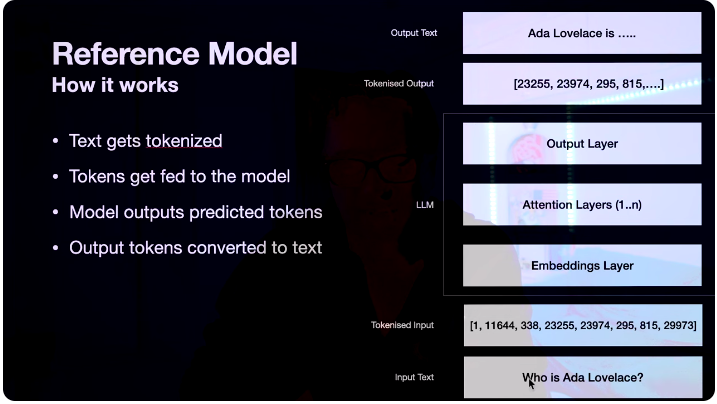